<a href="https://colab.research.google.com/github/bhattacharyyad/Scopus_Data/blob/master/Copy_of_Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

# Load pre-trained MobileNetV2 model + higher level layers
model = MobileNetV2(weights='imagenet')

# Load an image file that contains a cat or dog to test, resizing it to 224x224 pixels (required input size for MobileNetV2)
img_path = '/home/Files/cat1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict the image class
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02124075', 'Egyptian_cat', np.float32(0.14535625)), ('n02123045', 'tabby', np.float32(0.09315762)), ('n02123159', 'tiger_cat', np.float32(0.058733437))]


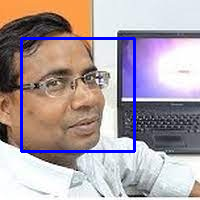

In [23]:
!pip install opencv-python-headless
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow


# Load the pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
img = cv2.imread('/home/Files/DB_Photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output using cv2_imshow instead of cv2.imshow
cv2_imshow(img) # Use cv2_imshow to display the image

cv2.waitKey(0)
cv2.destroyAllWindows()

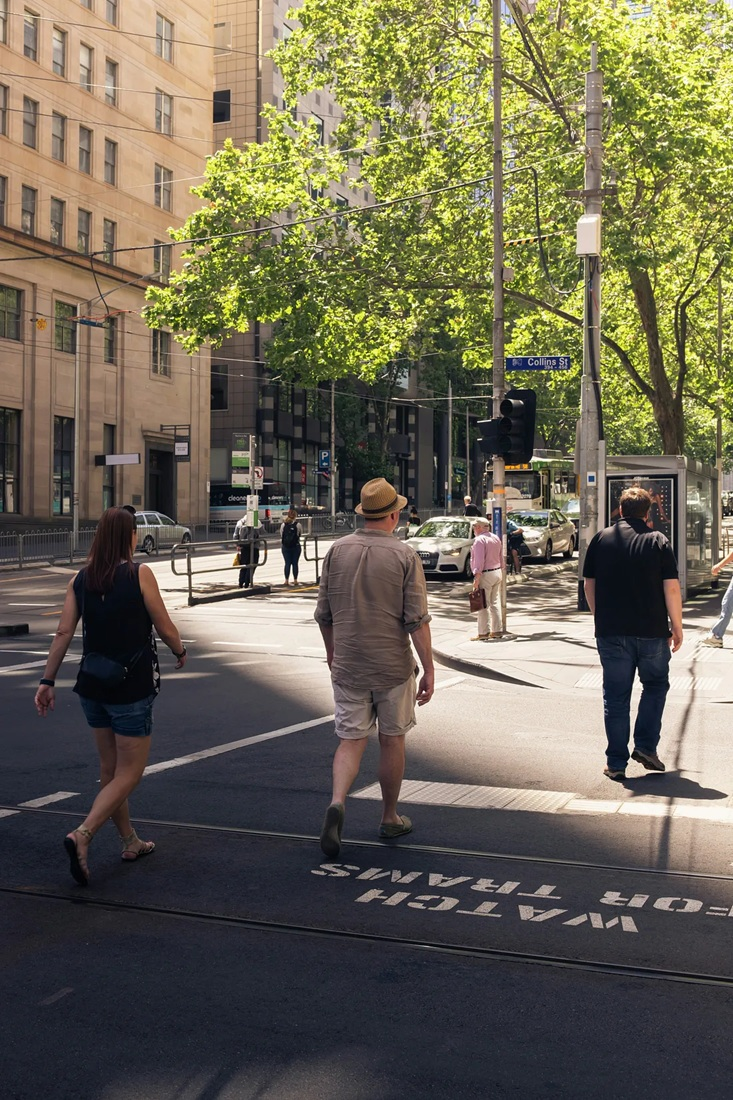

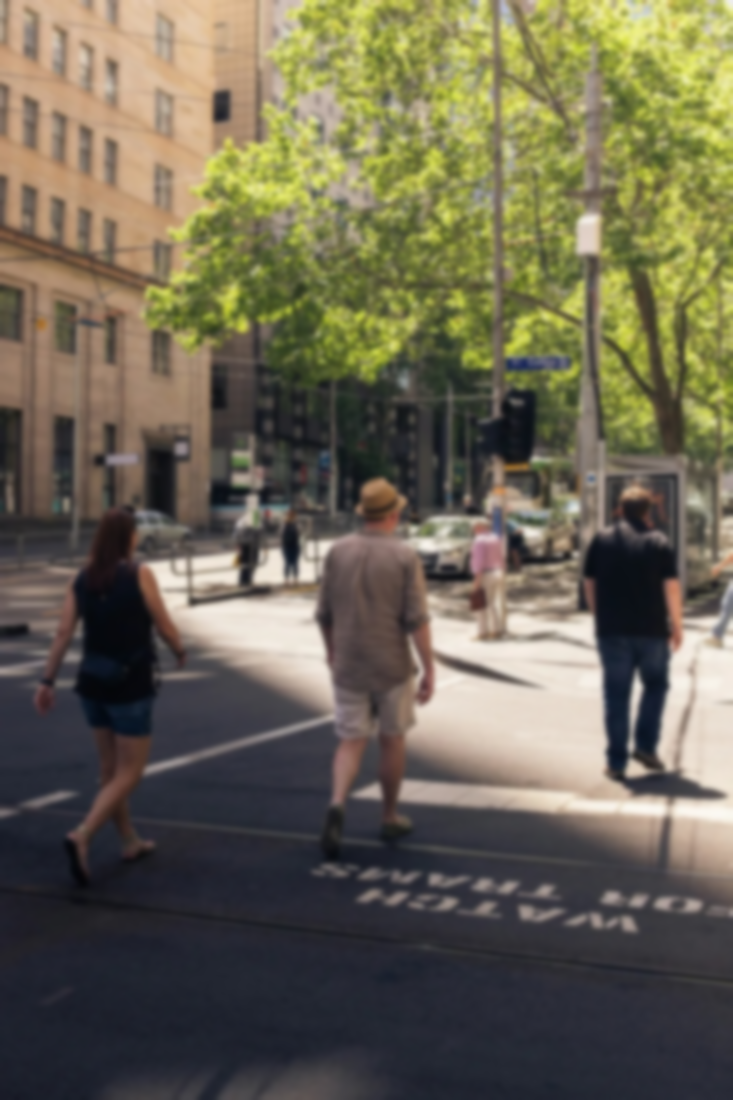

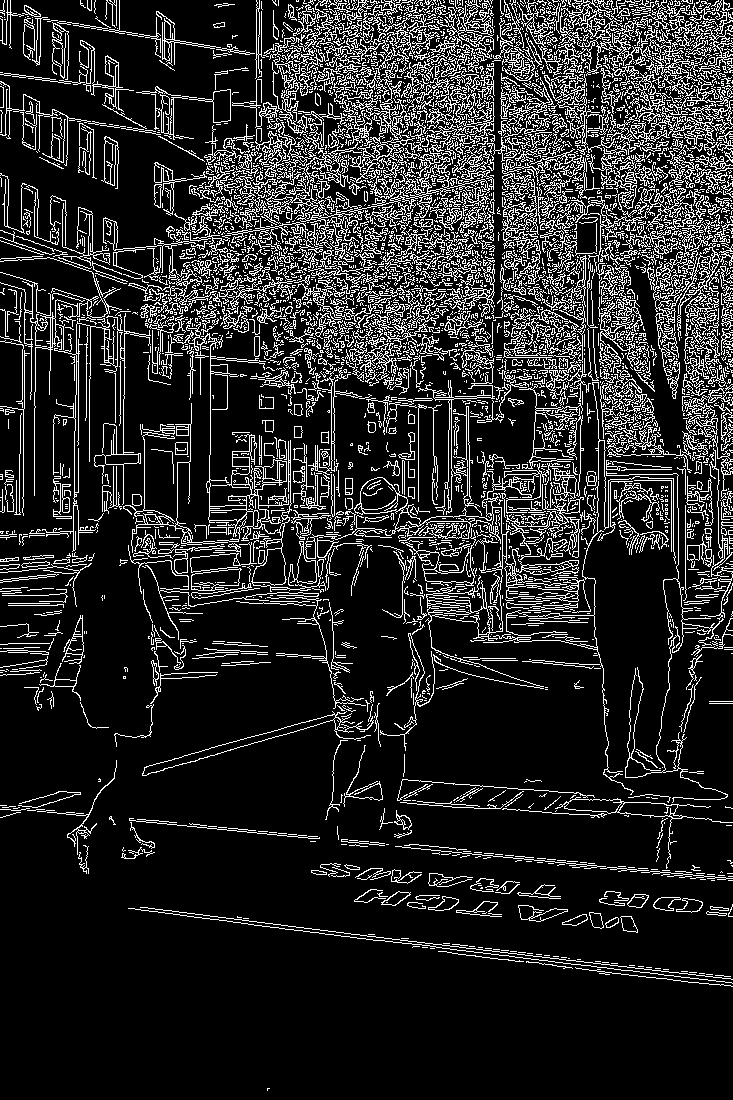

In [25]:
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Read the image
img = cv2.imread('/home/People.jpg')

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the file path and ensure the image is valid.")
else:
    # Apply Gaussian Blur
    blurred_img = cv2.GaussianBlur(img, (15, 15), 0)

    # Apply Edge Detection
    edges = cv2.Canny(img, 100, 200)

    # Display the images using cv2_imshow
    cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow
    cv2_imshow(blurred_img)  # Use cv2_imshow instead of cv2.imshow
    cv2_imshow(edges)  # Use cv2_imshow instead of cv2.imshow
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [46]:
import math

class CustomTracker:
    def __init__(self):
        # Store the center positions of the objects
        self.custom_center_points = {}
        # Keep the count of the IDs
        # each time a new object id detected, the count will increase by one
        self.custom_id_count = 0

    def custom_update(self, custom_objects_rect):
        # Objects boxes and ids
        custom_objects_bbs_ids = []

        # Get center point of new object
        for custom_rect in custom_objects_rect:
            x, y, w, h = custom_rect
            cx = (x + x + w) // 2
            cy = (y + y + h) // 2

            # Find out if that object was detected already
            same_object_detected = False
            for custom_id, pt in self.custom_center_points.items():
                dist = math.hypot(cx - pt[0], cy - pt[1])

                if dist < 35:
                    self.custom_center_points[custom_id] = (cx, cy)
                    custom_objects_bbs_ids.append([x, y, w, h, custom_id])
                    same_object_detected = True
                    break

            # New object is detected we assign the ID to that object
            if same_object_detected is False:
                self.custom_center_points[self.custom_id_count] = (cx, cy)
                custom_objects_bbs_ids.append([x, y, w, h, self.custom_id_count])
                self.custom_id_count += 1

        # Clean the dictionary by center points to remove IDS not used anymore
        new_custom_center_points = {}
        for custom_obj_bb_id in custom_objects_bbs_ids:
            _, _, _, _, custom_object_id = custom_obj_bb_id
            center = self.custom_center_points[custom_object_id]
            new_custom_center_points[custom_object_id] = center

        # Update dictionary with IDs not used removed
        self.custom_center_points = new_custom_center_points.copy()
        return custom_objects_bbs_ids


In [ ]:
!pip install opencv-python
!pip install cvlib

In [ ]:
import cv2
import cvlib
from cvlib.object_detection import draw_bbox

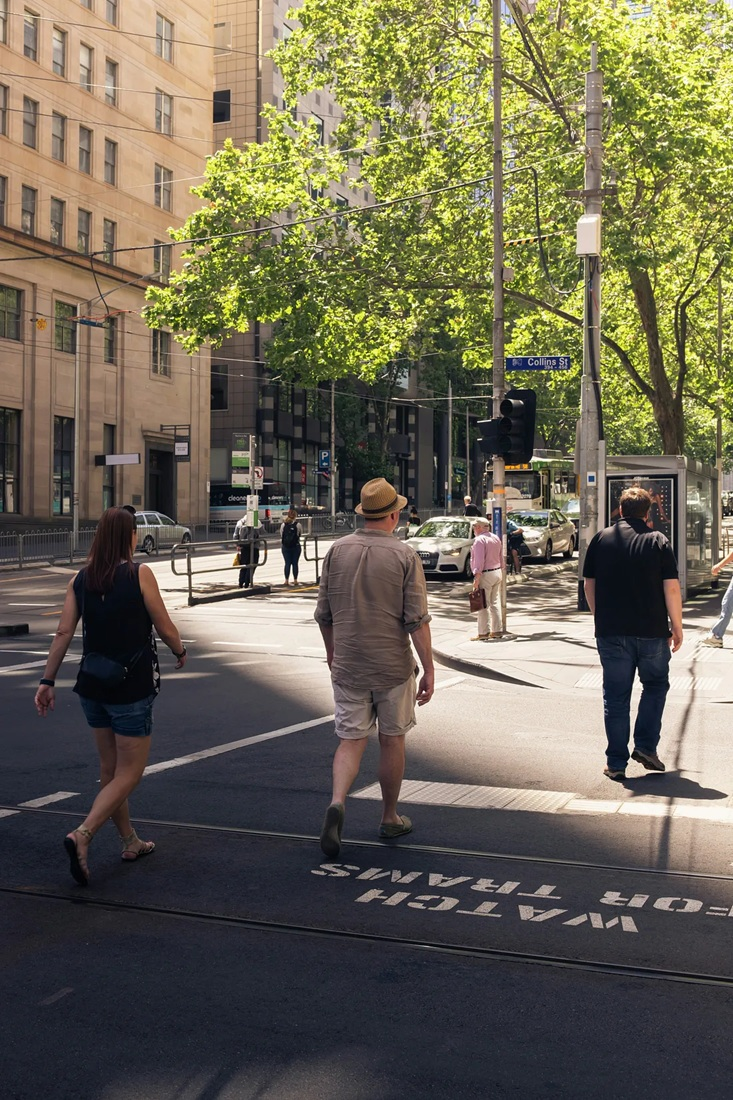

-1

In [ ]:
# Load and display the image in a window
image = cv2.imread("/home/People.jpg")
# Import the necessary function for display in Google Colab
from google.colab.patches import cv2_imshow

# Use cv2_imshow instead of cv2.imshow
cv2_imshow(image)

# Wait for a key press
cv2.waitKey(0)

In [26]:
!pip install opencv-python cvlib

In [28]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("/home/People.jpg")


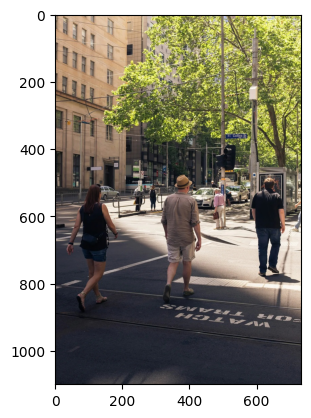

In [29]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb)
plt.show()


0: 640x448 7 persons, 4 cars, 1 traffic light, 142.1ms
Speed: 4.0ms preprocess, 142.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 448)


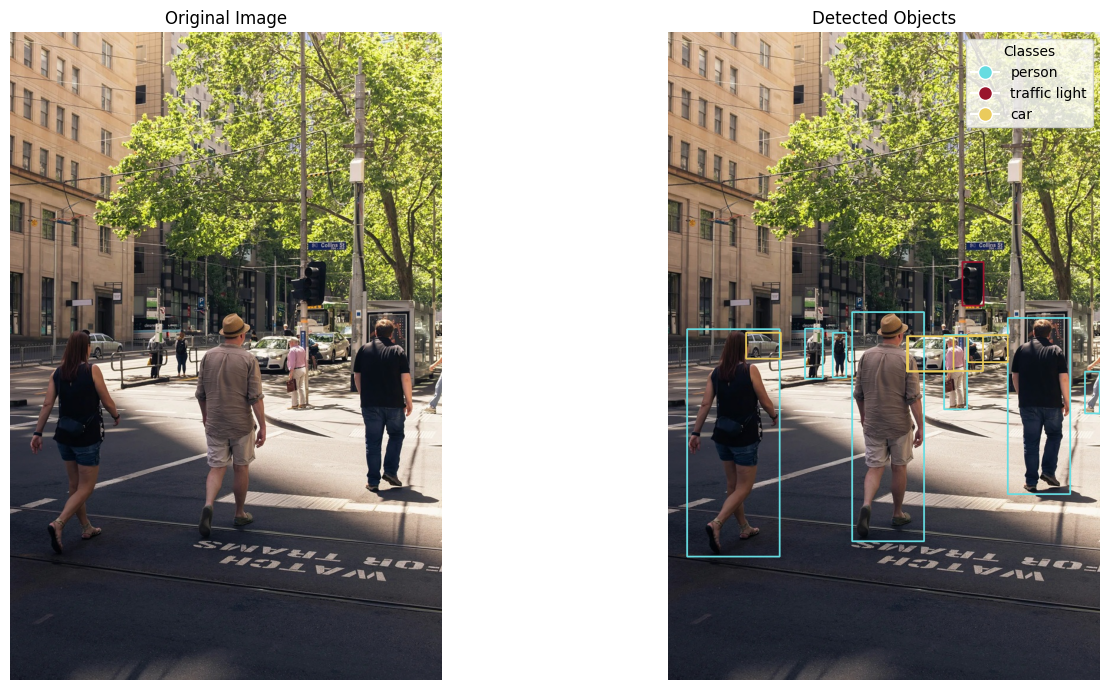

In [43]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

def detect_objects(image_path):
    """
    Detect objects in an image using YOLOv8.

    Args:
        image_path: Path to the input image

    Returns:
        Detected objects and class labels.
    """
    # Load YOLO model
    model = YOLO('yolov8n.pt')  # Load the model

    # Read image
    image = cv2.imread('/home/People.jpg')
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform detection
    results = model(image_rgb)[0]

    # Create a copy of the image for drawing
    annotated_image = image_rgb.copy()

    # Generate random colors for classes
    np.random.seed(42)  # For consistent colors
    colors = np.random.randint(0, 255, size=(100, 3), dtype=np.uint8)

    # To hold class names and their corresponding colors
    class_labels = {}

    # Process detections
    boxes = results.boxes

    return boxes, results.names, annotated_image, colors

def show_results(image_path, confidence_threshold):
    """
    Show original image and detection results side by side.

    Args:
        image_path: Path to the input image
        confidence_threshold: Minimum confidence score for detections
    """
    # Read original image
    original_image = cv2.imread('/home/People.jpg')
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Get detection results
    boxes, class_names, annotated_image, colors = detect_objects(image_path)

    # Process each detected object and apply confidence threshold filtering
    class_labels = {}
    for box in boxes:
        # Get box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Get confidence score
        confidence = float(box.conf[0])

        # Only show detections above confidence threshold
        if confidence > confidence_threshold:
            # Get class id and name
            class_id = int(box.cls[0])
            class_name = class_names[class_id]

            # Get color for this class
            color = colors[class_id % len(colors)].tolist()

            # Draw bounding box
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), color, 2)

            # Store class name and color for legend
            class_labels[class_name] = color

    # Create figure
    plt.figure(figsize=(15, 7))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    # Show detection results
    plt.subplot(1, 2, 2)
    plt.title('Detected Objects')
    plt.imshow(annotated_image)
    plt.axis('off')

    # Create legend
    legend_handles = []
    for class_name, color in class_labels.items():
        normalized_color = np.array(color) / 255.0  # Normalize the color
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                                           markerfacecolor=normalized_color, markersize=10))

    plt.legend(handles=legend_handles, loc='upper right', title='Classes')

    plt.tight_layout()
    plt.show()

# Example usage:
show_results('test.jpg', confidence_threshold=0.2)